## Анализ продаж компьютерных игр

В нашем распоряжении исторические данные до 2016 года из открытых доступных источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 


# Цель исследования 

Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# План исследования

1. Открыть файл с данными и изучить общую информацию.
2. Предобработка данных: 
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы. Описать в каких столбцах заменили тип данных;
- Обработать пропуски при необходимости. Объяснить почему заполнили пропуски определённым образом или почему не стали это делать. Описать причины, которые могли привести к пропускам;
- Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Исследовательский анализ данных
- Посмотреть сколько игр выпускалось в разные годы. Узнать важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Узнать за какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Узнать какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона.
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Узнать влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Пояснить:
- Как сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.
6. Общий вывод

## Откроем файл с данными и изучим общую информацию. 
Импортируем необходимые библиотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('games.csv') # прочитаем csv-файл

In [3]:
# Выведем первые 10 строчек датафрейма df на экран.
df.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов и 16715 строки. Типы данных в столбцах — float64(6), object(5). Количество значений в столбцах различается, значит в данных есть пропуски.

Согласно документации к данным:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.    

Посчитаем количество пропущенных значений.

In [5]:
df.isna().sum() # подсчёт пропусков

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропущенные значения есть в 6 столбцах. 

In [6]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывод:
В таблице 11 столбцов и 16715 строки. В некоторых столбцах есть некорректный тип данных, есть пропущенные значения (в 6 столбцах). Так же необходимо изменить названия столбцов (привести их к нижнему регистру). 

## Предобработка данных

Заменим названия столбцов. Для удобства работы приведем их к нижнему регистру.

In [7]:
df.columns # названия столбцов 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
df.columns = df.columns.str.lower() # приводим все столбцы к нижнему регистру 

In [9]:
df.columns # проверяем результат

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Приступим к обработке пропусков в столбцах. 

In [10]:
df[df['name'].isna()] # посмотрим на пропуски в столбце name.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Заполнить пропуски в столбце с названием игры невозможно, так как мы не знаем о какой игре идет речь. Видно, что в этих строках есть еще пропуски в столбцах genre, critic_score, user_score, rating, поэтому, учитывая, что таких строк всего две, просто удалим их. Возможно при заполнении данных забыли указать название игры. Таким образом мы удалим и 2 пропуска в столбце genre.

In [11]:
df = df.dropna(subset=['name'])

In [12]:
df['name'].isna().sum() # проверим, что строки удалились. 

0

Рассмотрим столбец с годом выпуска игры year_of_release.

In [13]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


При заполнении данных, возможно, дата выходы игры не была известна. Но в некоторых названиях игры стоит год. Посмотрим, что он означает. Например, отфильтруем датасет по названию игры - "FIFA Soccer 2004" и посмотрим на год выпуска.  

In [14]:
name_filter = 'FIFA Soccer 2004'
df.query('name == @name_filter')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


Видим, что в названии игры стоит 2004 год, а год выпуска - 2003. Сезон игры фифа обычно начинается в августе, в сентябре. Поэтому игры выпускают перед началом сезона. То есть в сентябре 2023 года выйдет новая игра FIFA 2024. Попробуем отфильтровать данные по жанру sports. 

In [15]:
genre_filter = 'Sports'
df.query('genre == @genre_filter')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E
...,...,...,...,...,...,...,...,...,...,...,...
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16688,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,0.01,0.00,0.00,0.00,NaN,tbd,T
16693,PGA European Tour,N64,2000.0,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN


В строке 16676 в названии игры - "G1 Jockey 4 2008" стоит год 2008 и год релиза игры тоже 2008, будет неправильно заполнить пропуски в столбце year_of_release - годом из названия игры. Если посмотреть на выборку по игре "FIFA Soccer 2004", учитывая, что игры выпущены на разных платформах, видно, что год выпуска игры везде стоит 2003, значит игры выпускают одновременно на всех платформах. Проверим это предположение на другой игре.

In [16]:
genre_filter = 'LEGO Batman: The Videogame'
df.query('name == @genre_filter') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Можно попробовать заполнить пропуски в столбце year_of_release по дате выпуска игры на другой платформе.  

In [17]:
df.loc[df['year_of_release'].isna(), 'year_of_release'] = \
    df.loc[df['year_of_release'].isna(), 'name'].map(df.groupby('name')['year_of_release'].first())
 

In [18]:
# проверка заполнения 
genre_filter = 'LEGO Batman: The Videogame'
df.query('name == @genre_filter') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [19]:
df['year_of_release'].isna().sum() # посчитали сколько осталось пропусков

146

In [20]:
df['year_of_release'].isnull().sum() / len(df) * 100 # узнаем процент пропущенных значений в столбце year_of_release

0.8735714713097589

Пропуски составляют меньше 1% процента от данных, поэтому удалим их. 

In [21]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [22]:
df['year_of_release'] = df['year_of_release'].astype('int') # поменяем тип данных на целочисленные значения.. 

Посмотрим на пропуски в столбце critic_score - оценки критиков

In [23]:
df['critic_score'].isna().sum() # посчитаем пропуски в столбце critic_score.

8492

In [24]:
df['critic_score'].isnull().sum() / len(df) * 100 # узнаем процент пропущенных значений в столбце critic_score

51.258525985392644

Пропущенные значения составляют 52 % процента от данных (много). Заполнить их достоверными значениеми мы не можем, поэтому заполним пропуски условным значением -1.

In [25]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [26]:
df['critic_score'].isna().sum() # проверим заполнение пропусков. 

0

In [27]:
df['critic_score'] = df['critic_score'].astype('int') # изменим тип на int.

Посмотрим на пропуски в столбце user_score - оценки пользователей. 

In [28]:
df['user_score'].isna().sum() # посчитаем пропуски в столбце user_score.

6633

In [29]:
df['user_score'].isnull().sum() / len(df) * 100 # узнаем процент пропущенных значений в столбце user_score

40.03742379428986

In [30]:
df['user_score'].value_counts() # посмотрим на значения в столбце 

user_score
tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Видим, что в столбце есть аббревиатура 'tbd'- это аббревиатура от английского To Be Determined (будет определено) делаем вывод, что значение неизвестно, то есть является "NaN", поэтому заменим его тоже на значение -1. 

In [31]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = -1 # заменим все значения равные tbd на -1.

In [32]:
df['user_score'].value_counts()

user_score
-1     2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Поступим аналогично столбцу с оценками критиков, заполним пропуски в столбце user_score условным значением -1.

In [33]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'].isna().sum() # проверим заполнение пропусков.

0

In [34]:
df['user_score'].value_counts() # проверим заполнение пропусков 

user_score
-1     9027
7.8     324
8       288
8.2     279
8.3     253
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [35]:
df['user_score'] = df['user_score'].astype('float64') # изменим тип данных в числовой тип float64.

Пропуски в столбце rating - рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. А так как мы не знаем возрастные ограничения, поэтому пропуски заменим значением '-1'. ESRB рейтингует игры рынка Северной Америки и Канады, в Европе и Японии имеются свои рейтинги, отсюда возможны пропуски.

In [36]:
df['rating'].isna().sum() # посчитаем кол-во пропусков 

6699

In [37]:
df['rating'] = df['rating'].fillna(-1) # заменим пропуски на -1.
df['rating'].isna().sum()

0

- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [38]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

Предобработку завершили. Где возможно было заменили пропуски. Строки с пропусками в названиях игры и жанрах были удалены, так было всего два пропуска. Изменили тип данных в некоторых столбцах для удобства дальнейшей работы. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.

## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы.

In [39]:
number_of_games = df \
.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count') \
.sort_values(by = 'name', ascending=False)
number_of_games.head()

,name
year_of_release,
2008,1441
2009,1430
2010,1269
2007,1202
2011,1153


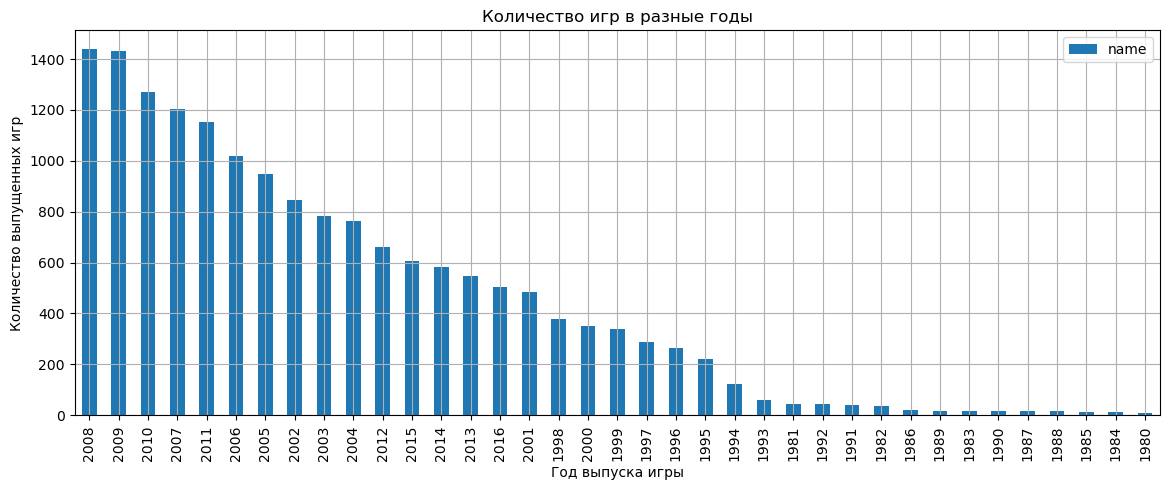

In [40]:
number_of_games.plot(y = 'name', figsize = (14, 5), kind = 'bar', grid=True);
plt.title('Количество игр в разные годы')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество выпущенных игр');

Пик выпущенных игр приходится на 2008-2009 гг. После наблюдается спад по выпуску игр. Возможно это связано с развитием информационных технологий, люди чаще стали использовать смартфоны и планшеты в качестве основной игровой платформы. В 80-е и 90-е года игры практически не выпускались - лишь небольшое количество до 200-300 игр, поэтому они не имеют большого значения в анализе. 

Посмотрим, как менялись продажи по платформам. 

In [41]:
number_of_platform = df \
.pivot_table(index = 'platform', values = 'total_sales',  aggfunc='sum') \
.sort_values(by = 'total_sales', ascending=False)
number_of_platform.head()

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28


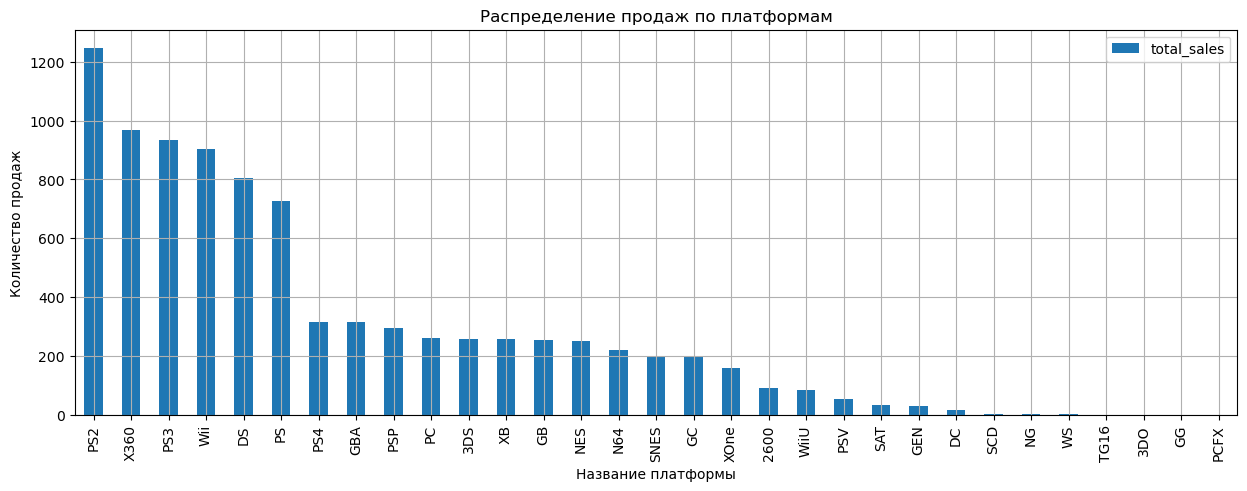

In [42]:
number_of_platform.plot(y = 'total_sales', figsize = (15, 5), kind = 'bar', grid=True);
plt.title('Распределение продаж по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');

Видим на графике, что платформы с наибольшими суммарными продажами это - PS2 (1247), X360 (966), PS3 (935), Wii (903), DS (804), PS (727). По остальным платформам количество продаж значительно ниже. 

Выберем платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS, PS и построим распределение по годам.

In [43]:
platform_ps2 = df.query("platform == 'PS2'") 

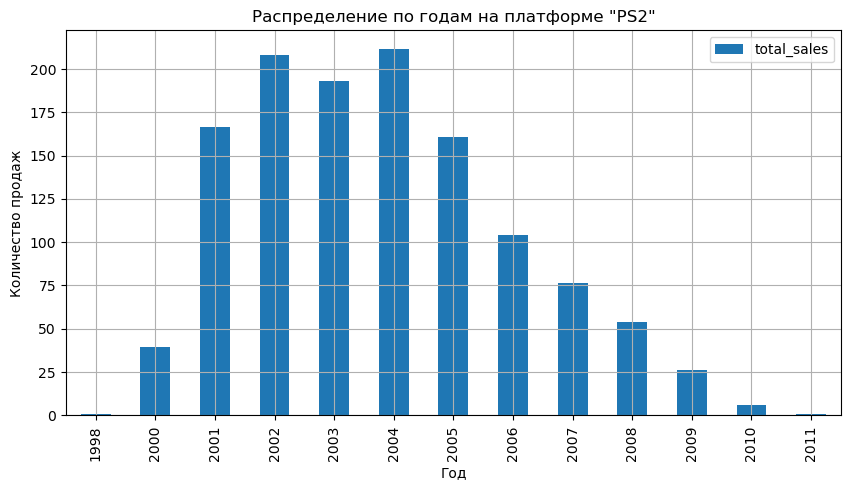

In [44]:
platform_ps2.pivot_table(index ='year_of_release', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5), kind='bar', grid=True)
plt.title('Распределение по годам на платформе "PS2"')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

Платформой "PS2" начали пользоваться в 1998 по 2011 год (13 лет). За 1999 нет данных. Активно этой платформой пользовались с 2001 по 2006 (6 лет).

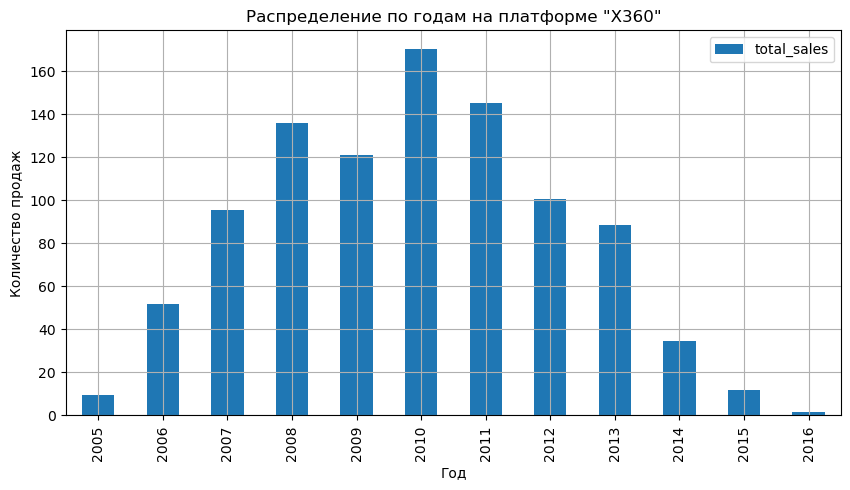

In [45]:
platform_x360 = df.query("platform == 'X360'")
platform_x360.pivot_table(index ='year_of_release', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5),
                          kind='bar', grid=True)
plt.title('Распределение по годам на платформе "X360"')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

Платформой активно "X360" пользовались с 2005 по 2016 год (12 лет). Активный период с 2007 по 2013 (7 лет).

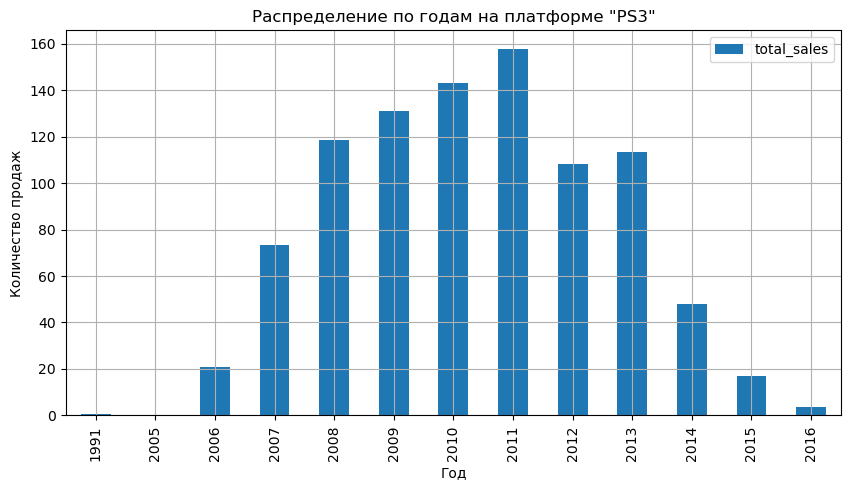

In [46]:
platform_ps3 = df.query("platform == 'PS3'")
platform_ps3.pivot_table(index ='year_of_release', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5), 
                         kind='bar', grid=True)
plt.title('Распределение по годам на платформе "PS3"')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

Платформой "PS3" пользовались с 2006 по 2016 год (11 лет).Активный период пользования с 2007 по 2013 (7 лет).

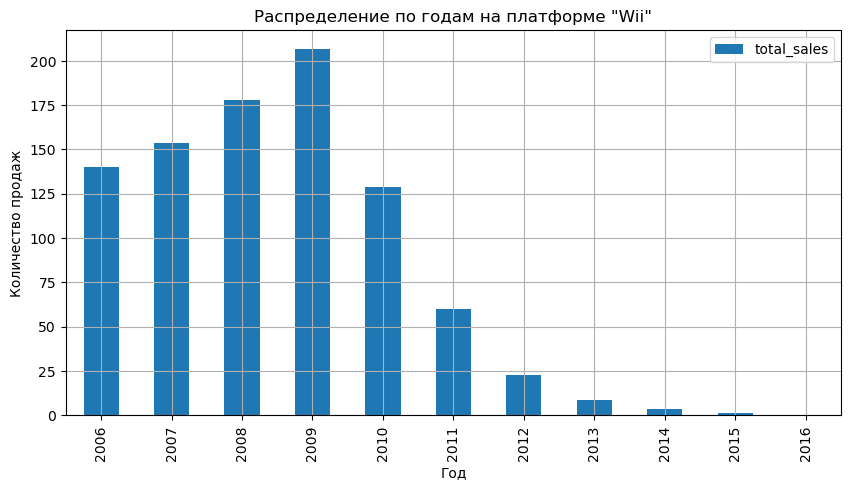

In [47]:
platform_wii = df.query("platform == 'Wii'")
platform_wii.pivot_table(index ='year_of_release', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5), kind='bar', grid=True)
plt.title('Распределение по годам на платформе "Wii"')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

Платформой "Wii" пользовались с 2006 по 2016 (11 лет). Активный период с 2006 по 2010 (5 лет).

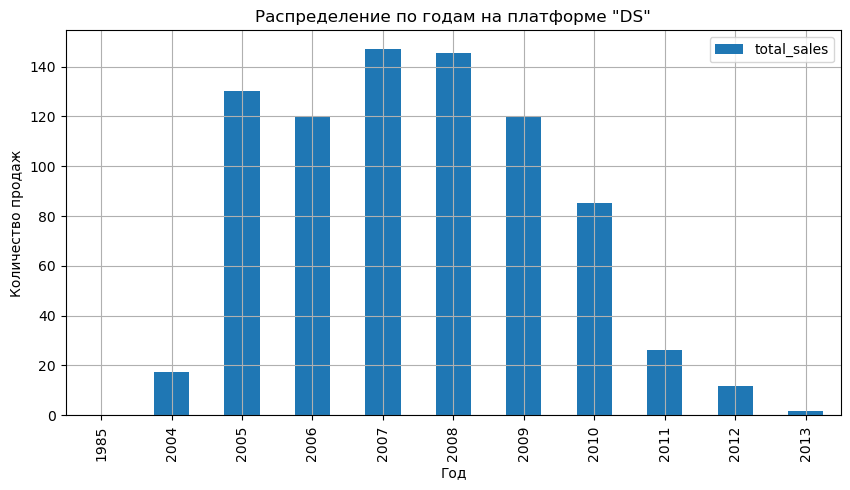

In [48]:
platform_ds = df.query("platform == 'DS'")
platform_ds.pivot_table(index ='year_of_release', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5), 
                        kind='bar', grid=True)
plt.title('Распределение по годам на платформе "DS"')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

Платформой "DS" начали пользоваться в 1985 году. Активно пользовалась популярностью эта платформа с 2005 по 2013 (6 лет). С 2011 года наблюдаем активный спад. Срок пользования этой платформой - 11 лет.

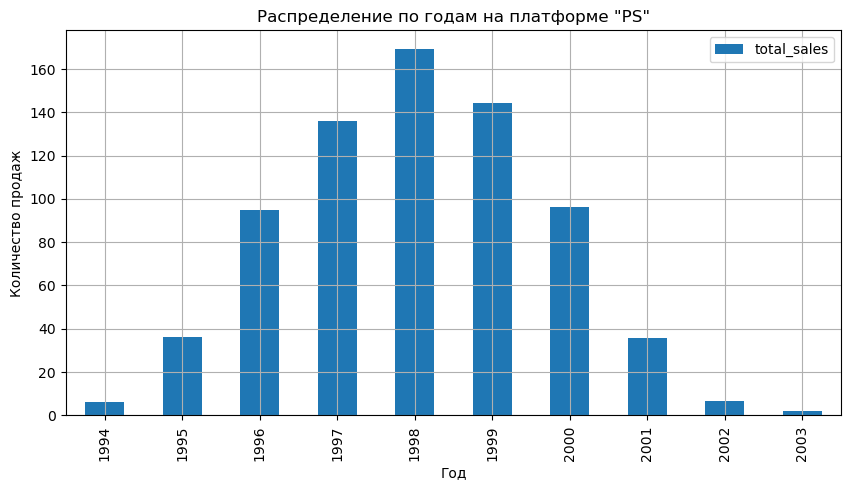

In [49]:
platform_ps = df.query("platform == 'PS'")
platform_ps.pivot_table(index ='year_of_release', values = 'total_sales', aggfunc = 'sum').plot(figsize=(10,5), 
                        kind='bar', grid=True)
plt.title('Распределение по годам на платформе "PS"')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

Платформой "PS" пользовались с 1994 по 2003 гг. (10 лет). Активный период - с 1996 по 2000 (5 лет).

Судя по диаграмам распределения средний срок пользования игровыми платформами составляет 10-11 лет. Активно пользуются платформами в течении 6 лет. 
    Ответим на вопрос за  какой характерный срок появляются новые и исчезают старые платформы на примере платформы PS:
- Платформой "PS" пользовались с 1994 по 2003 гг. (10 лет). Активный период - с 1996 по 2000 (5 лет).
- Платформой "PS2" начали пользоваться в 1998 по 2011 год (13 лет). Активно этой платформой пользовались с 2001 по 2006 (6 лет).
- Платформой "PS3" пользовались с 2006 по 2016 год (11 лет).Активный период пользования с 2007 по 2013 (7 лет).
- Каждые 4-8 лет выходит новая платформа, а предыдущая перестает пользоваться популярностью, но при это находится на рынке еще около 5 лет.

На мой взгляд, актуальный период для дальнейшего анализа с 2013 по 2016 год. Эти данные помогут построить прогноз на 2017 год. Данные за предыдущие годы в работе учитывать не будем. 

In [50]:
df_actual = df.query('year_of_release >= 2013')

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

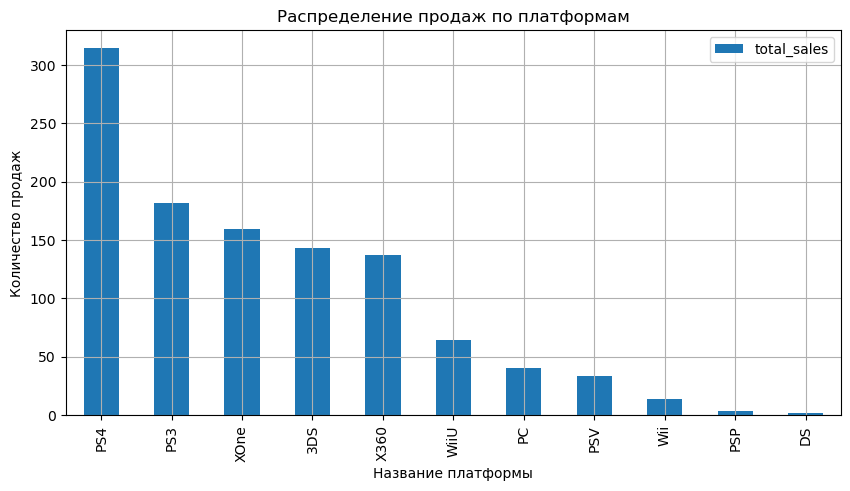

In [51]:
df_actual \
.pivot_table(index = 'platform', values = 'total_sales',  aggfunc='sum') \
.sort_values(by = 'total_sales', ascending=False) \
.plot(y = 'total_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение продаж по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');

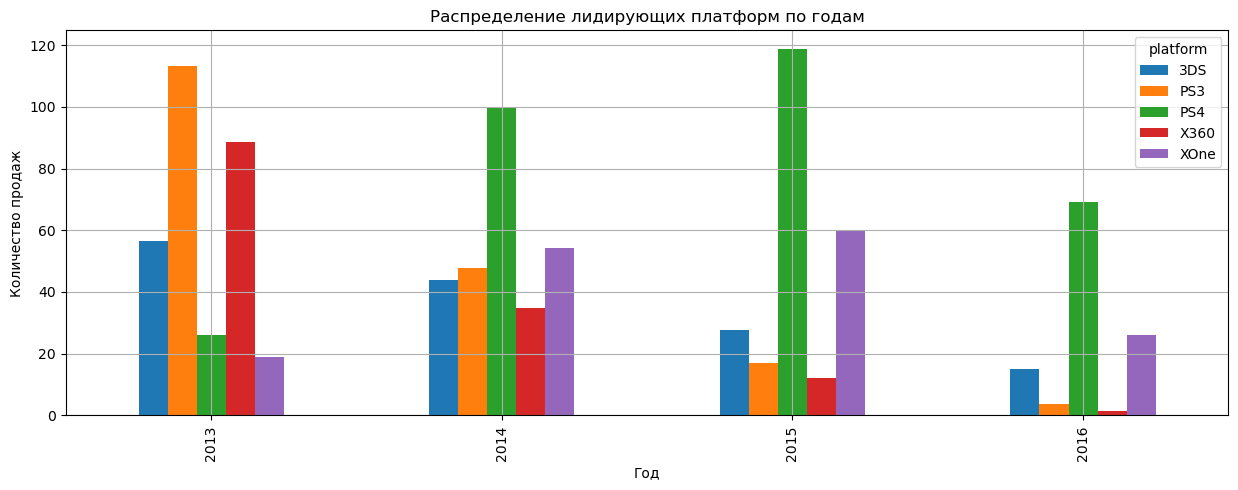

In [52]:
# посмотроим график распределения лидирующих платформ по годам.
df_years = df.query('platform == ["PS4", "PS3", "X360", "3DS", "XOne"] & year_of_release >= 2013')
df_years.pivot_table(index = 'year_of_release', columns = 'platform', 
                     values = 'total_sales',  aggfunc='sum').plot(figsize = (15, 5), kind = 'bar', grid=True);
plt.title('Распределение лидирующих платформ по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж');

По продаж лидирует платформа PS4, остальные платформы находятся примерно на одном уровне по продажам - PS3, XOne, 3DS, X360.
На графике явно видно, что продажи PS3 в 2013 растут, а с 2014 по 2016 снижается, так как в 2014 вышла новая платформа PS4. Количество продаж в 2016 году на каждой платформе заметно снижается, видим, что на платформах PS3 и X360 они вообще незначительные, поэтому далее будем анализировать платформы PS4, XOne и 3DS.

Построим график «ящик с усами» по продажам игр в разбивке по платформам.

In [53]:
top_platforms = df.query('platform == ["PS4", "3DS", "XOne"] & year_of_release >= 2013')

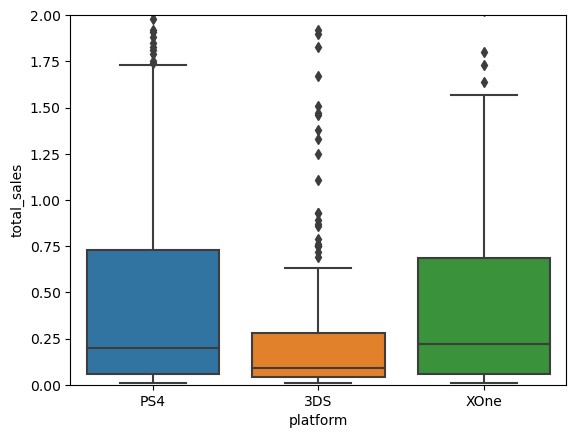

In [54]:
sns.boxplot(x='platform', y='total_sales', data = top_platforms)
plt.ylim([0,2]);

Самые высокие показатели по продажам у PS4 (в диапазоне от 0.7 до 0.74 млн.) и XOne (продажи в диапазоне от 0.7 до 0.7 млн.), а показатели продаж у 3DS невысокие от 0.5 до 0.30 млн. Медиана находится у PS4 и XOne примерно на одном и том же уровне, в районе 0.20 млн долларов, а у 3DS - 0.10 млн. 

Посмотрим на влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы - PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [55]:
platform_ps4= df.query("platform == 'PS4' & critic_score != -1 & user_score != -1")

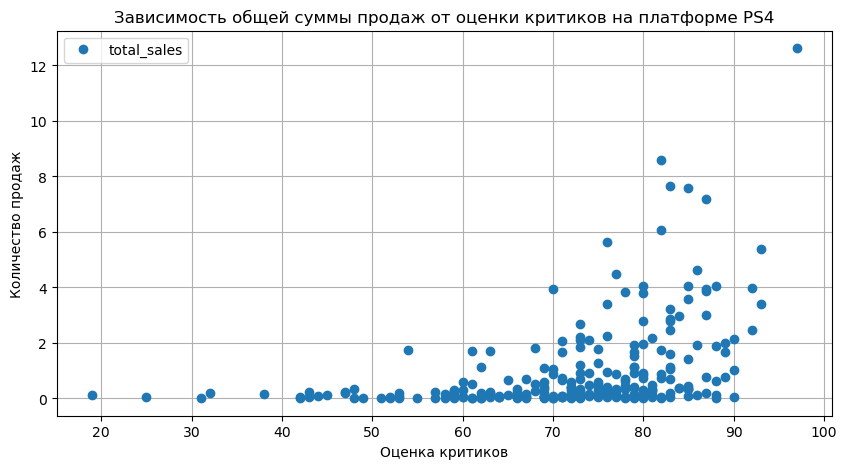

In [56]:
platform_ps4.plot(style='o', x='critic_score', y='total_sales', figsize=(10,5), grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Зависимость общей суммы продаж от оценки критиков на платформе PS4');

По графику видно, что чем выше оценка критиков, тем больше продаж. Основная часть отзывов критиков расположена в диапазоне от 70 до 90 баллов.

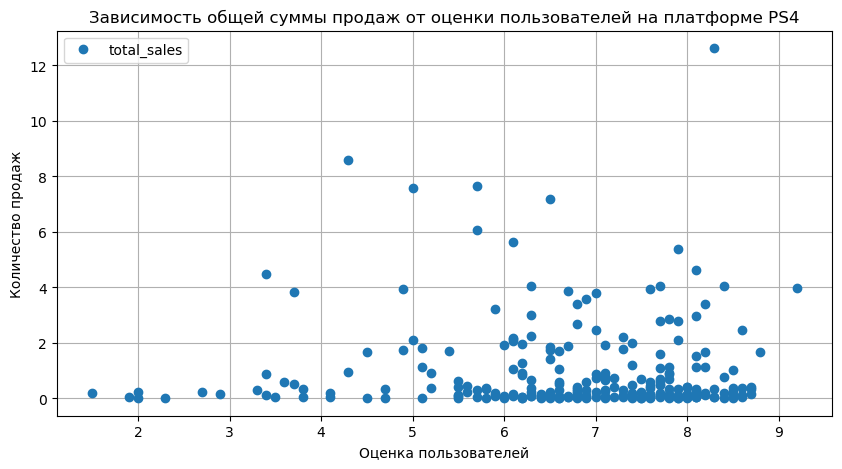

In [57]:
platform_ps4.plot(style='o', x='user_score', y='total_sales', figsize=(10,5), grid=True);
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.title('Зависимость общей суммы продаж от оценки пользователей на платформе PS4');

Аналогичная ситуация, как с оценками критиков. Чем выше рейтинг пользователей, тем больше продаж на платформе. Но видим, что есть выбросы, даже при средней оценке пользователей - игру покупают. Может это связано с тем, что игра популярная и на оценки пользователей не всегда обращают внимания. Основная часть отзывов пользователей расположена в диапазоне от 6 до 8,5 баллов.

In [58]:
platform_ps4[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.033625
critic_score,0.557654,1.000000,0.405895
total_sales,-0.033625,0.405895,1.000000


Корреляция между продажами и оценками пользователей отрицательная - зависимости нет. Есть небольшое влияние оценки критиков на продажи (коэфиц. корреляции 0.4). Коэффициент корреляции между оценками критиков и оценками пользователей равен 0,55.

Соотнесем выводы с продажами игр на других платформах.

In [59]:
platform_3ds = df.query("platform == '3DS' & critic_score != -1 & user_score != -1")
platform_3ds[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.744286,0.232444
critic_score,0.744286,1.000000,0.338426
total_sales,0.232444,0.338426,1.000000


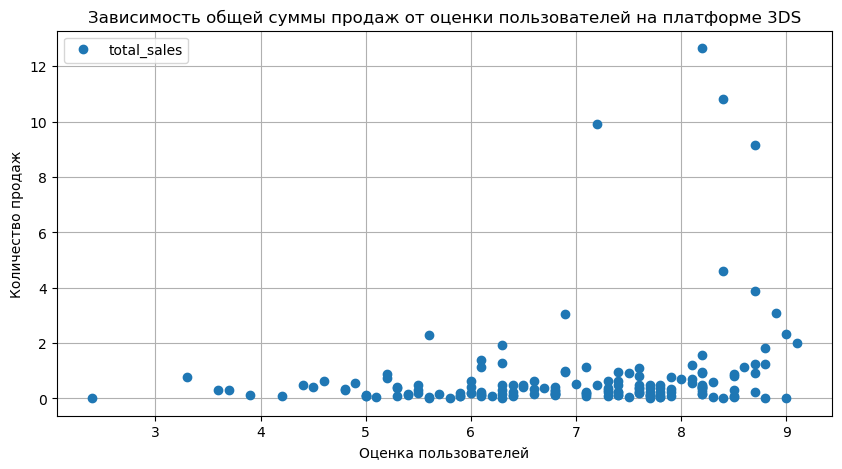

In [60]:
platform_3ds.plot(style='o', x='user_score', y='total_sales', figsize=(10,5), grid=True);
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.title('Зависимость общей суммы продаж от оценки пользователей на платформе 3DS');

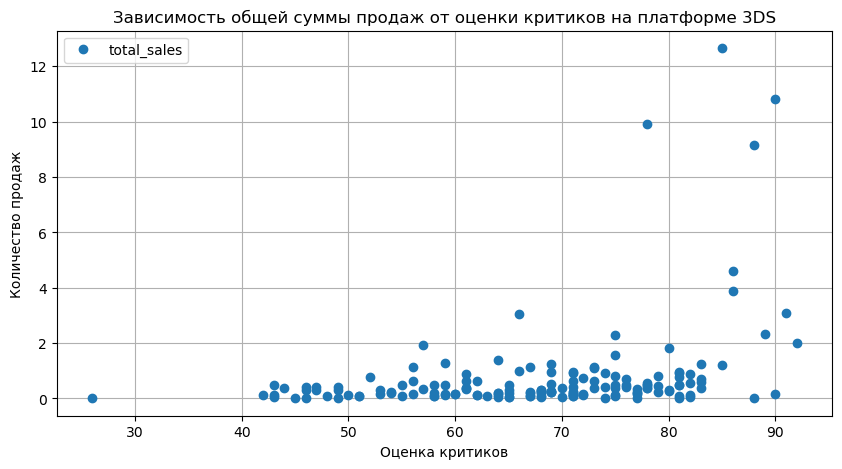

In [61]:
platform_3ds.plot(style='o', x='critic_score', y='total_sales', figsize=(10,5), grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Зависимость общей суммы продаж от оценки критиков на платформе 3DS');

Корреляция между продажами и оценками слабая (0,23 у пользователей и 0.33 у критиков). Основная часть отзывов пользователей расположена в диапазоне от 5 до 9 баллов, а критиков в диапазоне от 50 до 83 баллов. 

In [62]:
platform_xone = df.query("platform == 'XOne' & critic_score != -1 & user_score != -1")
platform_xone[['user_score', 'critic_score', 'total_sales']].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.472462,-0.094003
critic_score,0.472462,1.000000,0.410422
total_sales,-0.094003,0.410422,1.000000


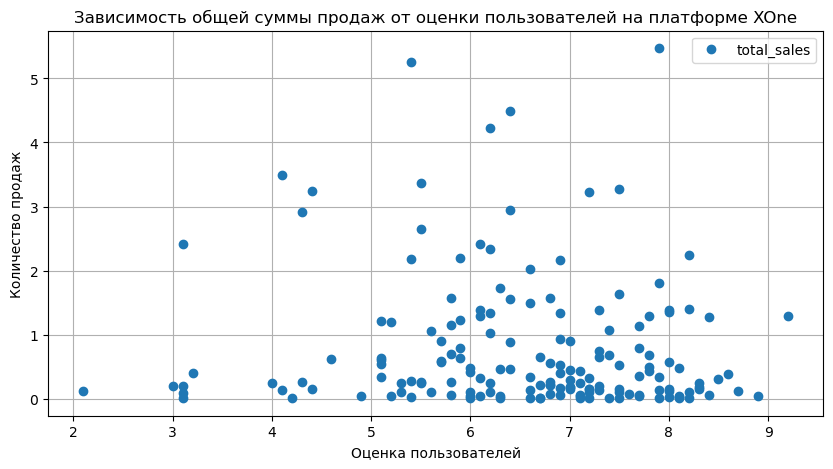

In [63]:
platform_xone.plot(style='o', x='user_score', y='total_sales', figsize=(10,5), grid=True);
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество продаж')
plt.title('Зависимость общей суммы продаж от оценки пользователей на платформе XOne');

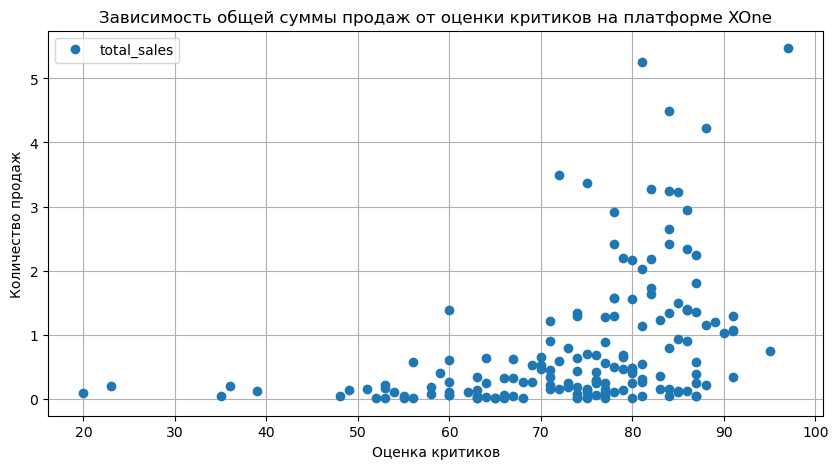

In [64]:
platform_xone.plot(style='o', x='critic_score', y='total_sales', figsize=(10,5), grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Зависимость общей суммы продаж от оценки критиков на платформе XOne');

Корреляция между продажами и оценками у пользователей -0.09 (отрицательная) - зависимости нет, а у критиков - 0.41 - средняя зависимость. Основная часть отзывов пользователей расположена в диапазоне от 5 до 8,5 баллов, а критиков в диапазоне от 60 до 89 баллов. Чем выше оценка критиков, тем больше продаж. 

Выводы практически одинаковы для всех трех рассмотренных платформ, коэффициенты корреляции практически идентичны. Критики более точно прогнозируют популярность игры, чем пользователи. По графикам видно, что основная часть отзывов пользователей расположена в диапазоне от 5 до 9 баллов, а критиков в диапазоне от 60 до 90 баллов. Так же по графикам четко видно, что чем выше оценка пользователей или критиков, тем выше продажи на платформах. 

Посмотрим на распределение игр по жанрам. Для этого построим график распределения суммарных и медианных продаж игр по жанрам. И посчитаем количество игр. 

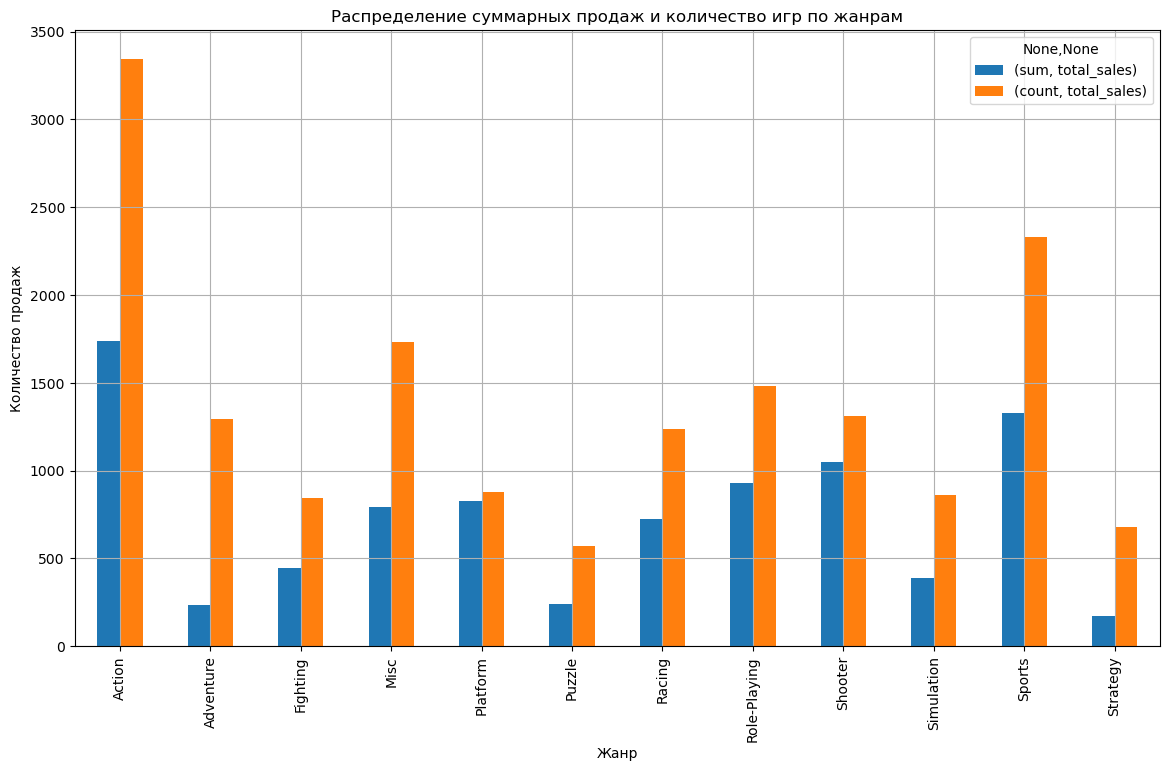

In [65]:
# посмотроим на график распределения суммарных продаж игр по жанрам.
df.pivot_table(index = 'genre', values = 'total_sales',  aggfunc= ['sum', 'count']).plot(figsize = (14, 8), kind = 'bar', grid=True);
plt.title('Распределение суммарных продаж и количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж');

Самый прибыльный жанр Action - большое количество проданных игр. Следом за ним наиболее популярные - sports, shooter, role-playing. Наименее прибыльные игры - strategy, adventure, puzzle.

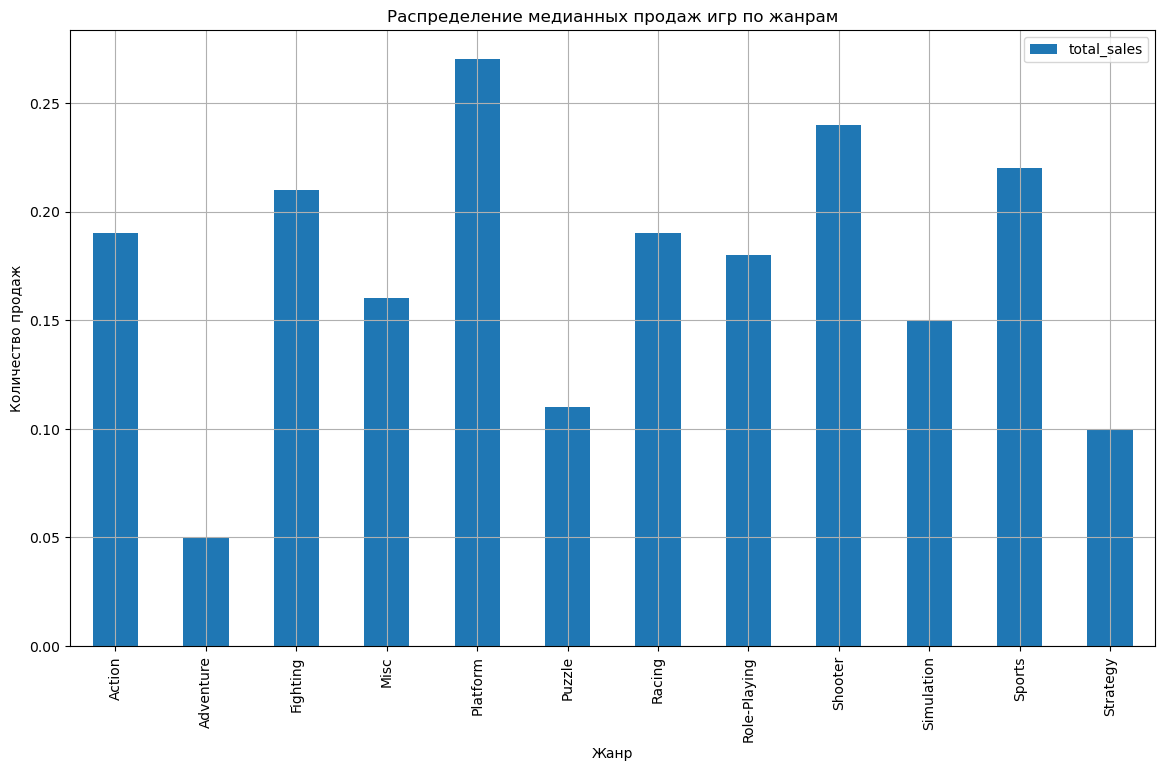

In [66]:
# посмотроим на график распределения медианных продаж игр по жанрам.
df.pivot_table(index = 'genre', values = 'total_sales',  aggfunc='median').plot(figsize = (14, 8),
               kind = 'bar',grid=True)
plt.title('Распределение медианных продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж');

<div class="alert alert-info">
<b>На графике медианных значений продаж видим, что на 1 месте находится жанр Platform, следом за ним  жанры Shooter и Sports. Жанры с низкими продажами - Puzzle, Strategy и Adventure. </b>
<br>
</div>

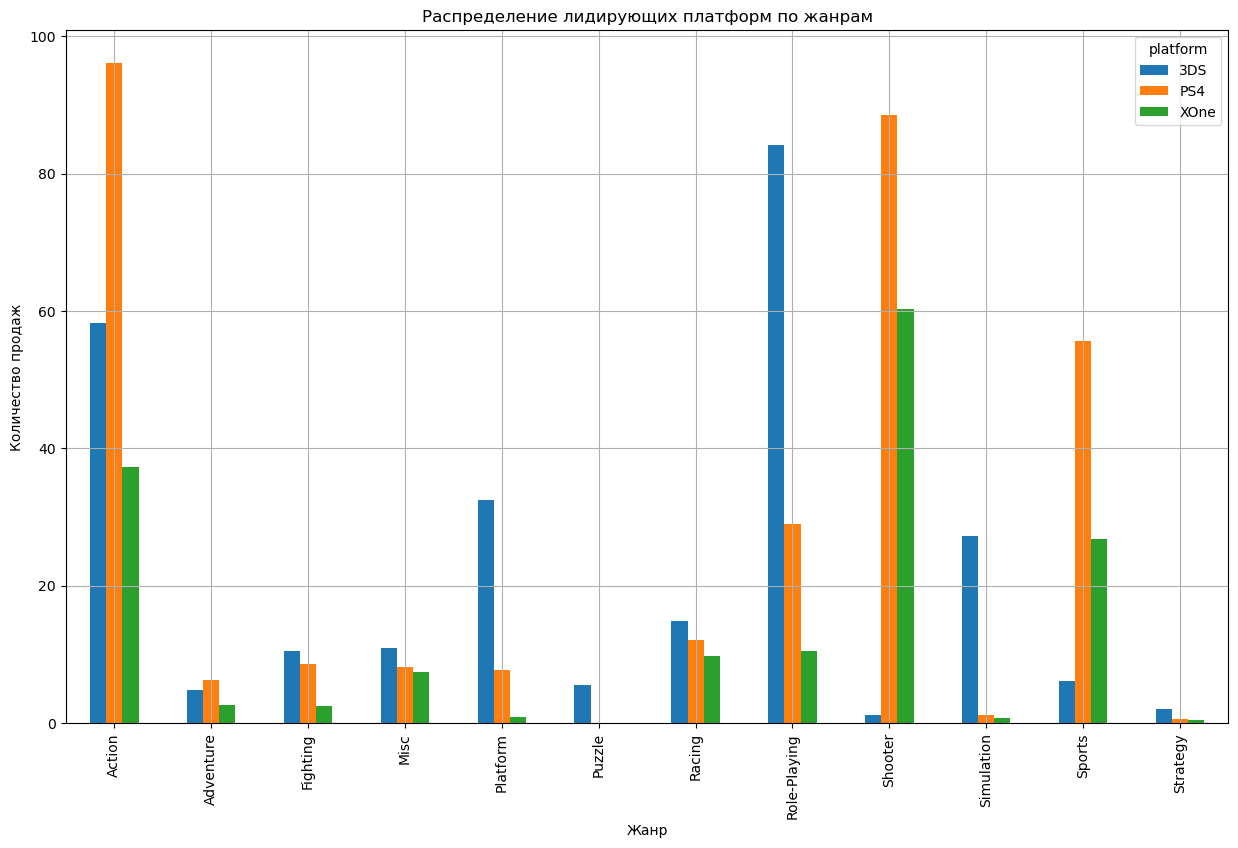

In [67]:
# посмотроим график распределения лидирующих платформ по жанрам.
top_platforms = df.query('platform == ["PS4", "3DS", "XOne"]')
top_platforms.pivot_table(index = 'genre', columns = 'platform', values = 'total_sales',  aggfunc='sum').plot(figsize = (15, 9), 
                          kind = 'bar', grid=True);
plt.title('Распределение лидирующих платформ по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж');

- Платформа "PS4" - наиболее популярные жанры Action (95), shooter (87), sports (68). 
- Платформа "3DS" - наиболее популярные жанры role-playing (84), Action (58).
- Платформа "XOne" - наиболее популярен жанр shooter (61). Жанр Action (47) менее популярен на этой платформе (хотя он занимает 1 место в общем рейтинге).

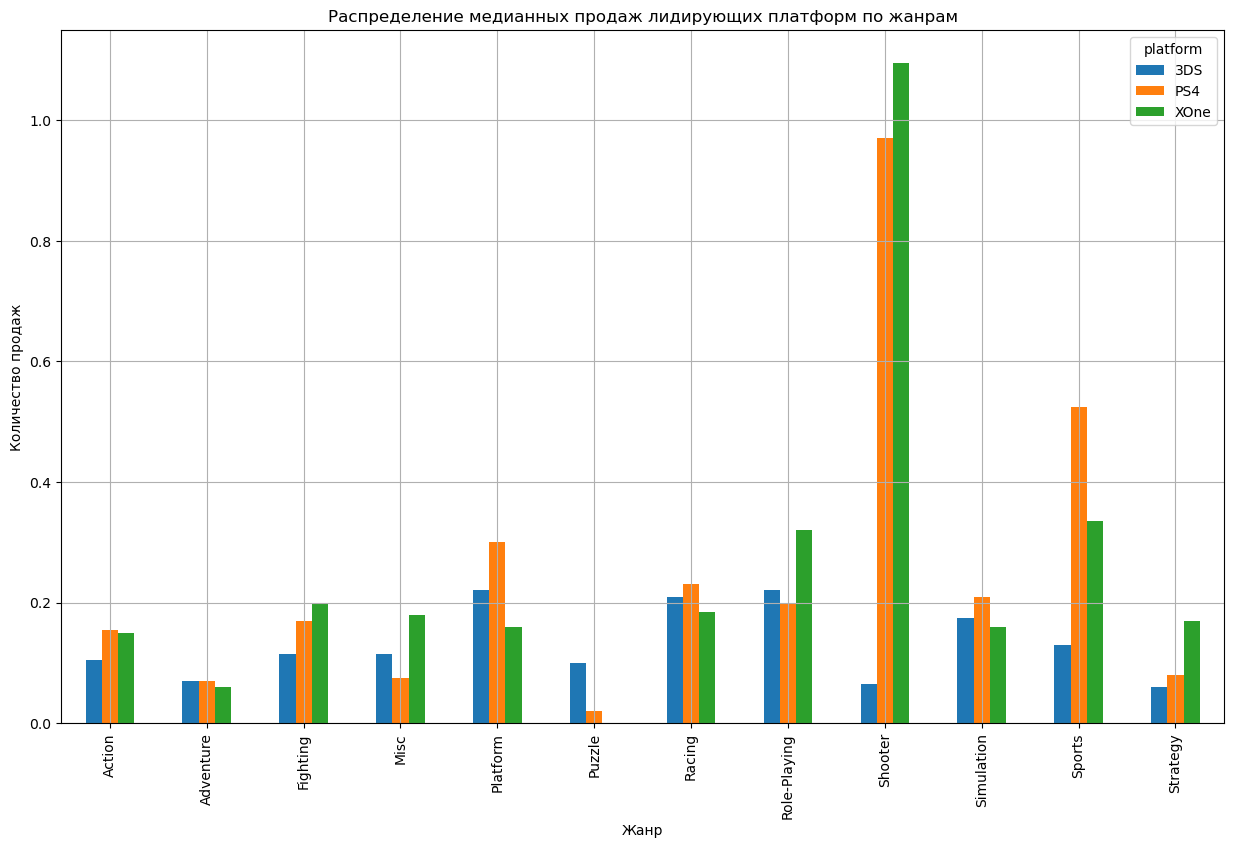

In [68]:
# посмотроим график распределения медианных продаж лидирующих платформ по жанрам.
top_platforms = df.query('platform == ["PS4", "3DS", "XOne"]')
top_platforms.pivot_table(index = 'genre', columns = 'platform', values = 'total_sales',
                          aggfunc='median').plot(figsize = (15, 9), kind = 'bar', grid=True);
plt.title('Распределение медианных продаж лидирующих платформ по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж');

По медианным продажам следующие результаты: 
- Платформа "PS4" - наиболее популярные жанры shooter, sports и platform. 
- Платформа "XOne" - наиболее популярен жанр shooter.
- На платформе "3DS" -все жанры примерно на одном уровне находятся. 

# Вывод
- Пик выпущенных игр приходится на 2008-2009 гг. После наблюдается спад по выпуску игр. Возможно это связано с развитием информационных технологий, люди чаще стали использовать смартфоны и планшеты в качестве основной игровой платформы.
- Платформы с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS, PS.
- Средний срок пользования игровыми платформами составляет 10-11 лет. Активно пользуются платформами в течении 6 лет. 
- Каждые 4-8 лет выходит новая платформа, а предыдущая перестает пользоваться популярностью, но при это находится на рынке еще около 5 лет.
- Самые высокие показатели по продажам у PS4 (в диапазоне от 0.7 до 0.74 млн.), остальные платформы находятся примерно на одном уровне по продажам - PS3, XOne, 3DS, X360. 
- Оценки критиков более точно прогнозируют популярность игры, чем оценки пользователей. Чем выше рейтинг пользователей и критиков, тем больше продаж на платформах.
- Самый прибыльные жанры - Action, sports, shooter, role-playing. Медианные продажи выше всего в жанре Platform, следом за ним  жанры Shooter и Sports. 
- Наименее прибыльные игры - strategy, adventure, puzzle. 


## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Посмотроим графики распределения продаж на платформах для каждого региона (NA, EU, JP) . Определим самые популярные платформы. 

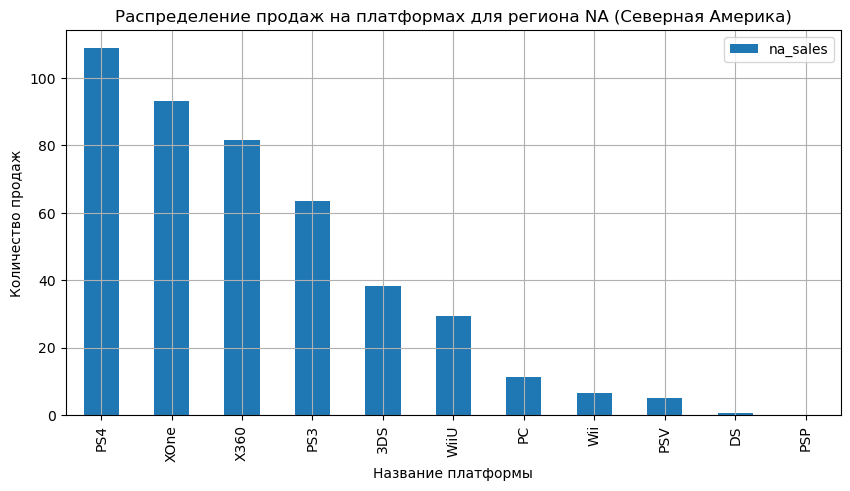

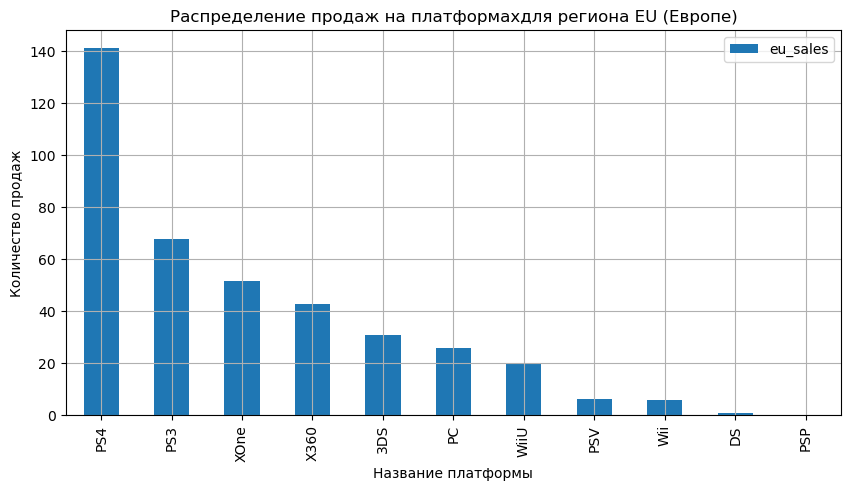

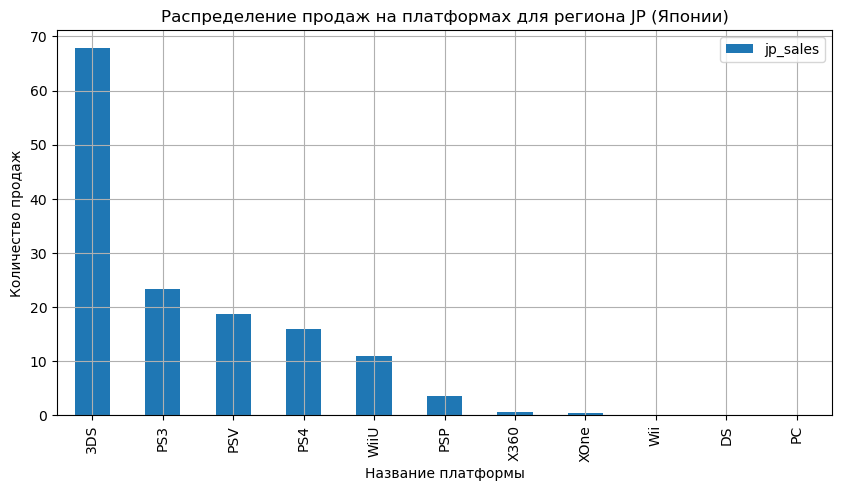

In [69]:
df_na = df_actual \
    .pivot_table(index = 'platform', values = 'na_sales',  aggfunc='sum') \
    .sort_values(by = 'na_sales', ascending=False) \
    .plot(y = 'na_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение продаж на платформах для региона NA (Северная Америка)')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');


df_eu = df_actual \
    .pivot_table(index = 'platform', values = 'eu_sales',  aggfunc='sum') \
    .sort_values(by = 'eu_sales', ascending=False) \
    .plot(y = 'eu_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение продаж на платформахдля региона EU (Европе)')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');


df_jp = df_actual \
    .pivot_table(index = 'platform', values = 'jp_sales',  aggfunc='sum') \
    .sort_values(by = 'jp_sales', ascending=False) \
    .plot(y = 'jp_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение продаж на платформах для региона JP (Японии)')
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж');


- Самые популярные платформы (топ-5) в Северной Америке: PS4 (108), XOne (93), X360 (81), PS3 (63) и 3DS(38).
- Самые популярные платформы (топ-5) в Европе: PS4 (141), PS3 (67), XOne (51), X360 (42) и 3DS (30).
- Самые популярные платформы (топ-5) в  Японии: 3DS (67), PS3 (23), PSV (18), PS4 (15) и WiiU (10).
- В Северной Америке и Европе самой популярной платформой является PS4, но продаж в Европе больше, чем в Америке. В Японии PS4 находится на 4 месте по популярности, а на первом месте платформа 3DS, которая в Северной Америке и Европе, находится на  5 месте. 
В Америке и Европе топ-5 платформ одинаковые, только отличаются долями по продажам.

Посмотроим графики распределения платформ по жанрам для каждого региона (NA, EU, JP) . Определим самые популярные платформы. 

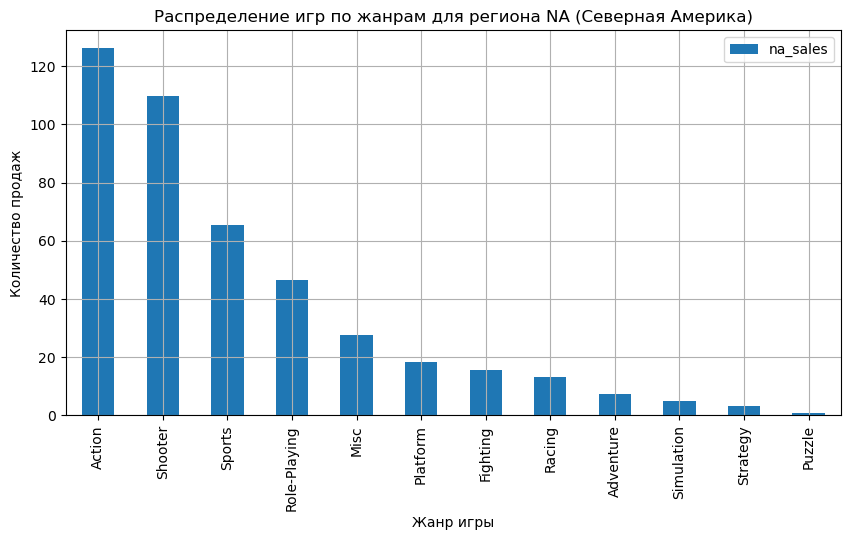

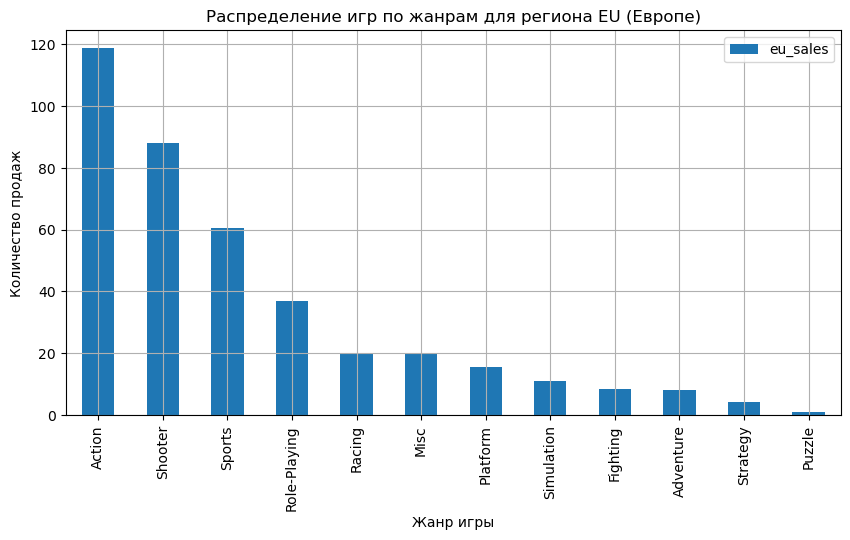

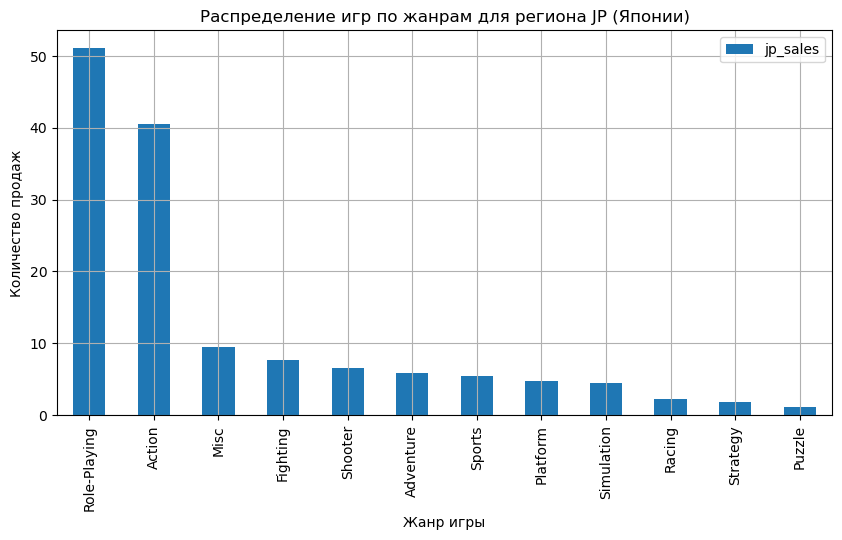

In [70]:
df_na_genre = df_actual \
    .pivot_table(index = 'genre', values = 'na_sales',  aggfunc='sum') \
    .sort_values(by = 'na_sales', ascending=False) \
    .plot(y = 'na_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение игр по жанрам для региона NA (Северная Америка)')
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж');


df_eu_genre = df_actual \
    .pivot_table(index = 'genre', values = 'eu_sales',  aggfunc='sum') \
    .sort_values(by = 'eu_sales', ascending=False) \
    .plot(y = 'eu_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение игр по жанрам для региона EU (Европе)')
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж');


df_jp_genre = df_actual \
    .pivot_table(index = 'genre', values = 'jp_sales',  aggfunc='sum') \
    .sort_values(by = 'jp_sales', ascending=False) \
    .plot(y = 'jp_sales', figsize = (10, 5), kind = 'bar', grid=True);
plt.title('Распределение игр по жанрам для региона JP (Японии)')
plt.xlabel('Жанр игры')
plt.ylabel('Количество продаж');

- Самые популярные жанры игр (топ-5) в Северной Америке: Action (126), Shooter (109), Sports(65), Role-Playing(46), Misc (27).
- Самые популярные жанры игр (топ-5) в Европе: Action (118), Shooter (87), Sports(60), Role-Playing(37), Racing (20)
- Самые популярные жанры игр (топ-5) в  Японии: Role-Playing (51), Action (40), Misc (9), Fighting	(7), Shooter (6).
- В Северной Америке и Европе самым популярным жанром является Action, а в Японии - Role-Playing. При этом в Японии жанр Action находится на втором месте.  В Америке и Европе жанры схожие, отличаются только 5 местом: Misc в Америке и Racing в Европе.

Узнаем влияет ли рейтинг ESRB на продажи в отдельном регионе? 

- E - для всех возрастов
- E 10+ лица старше 10 лет
- T - лица старше 13 лет 
- M - лица старше 17 лет 


Обратим внимание, что ESRB рейтингует игры рынка Северной Америки и Канады, в Европе и Японии есть свои рейтинги.

In [71]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for i in regions:
    rating_regions = df_actual.pivot_table(index='rating', values=i, aggfunc='sum').sort_values(i, ascending=False)
    print(rating_regions)

        na_sales
rating          
M         165.29
-1         89.42
E          79.05
E10+       54.24
T          49.79
        eu_sales
rating          
M         145.80
E          83.36
-1         78.91
E10+       42.69
T          41.95
        jp_sales
rating          
-1         85.29
T          20.59
E          15.14
M          14.11
E10+        5.89


В Северной Америке и Европе результаты схожи. Больше всего популярны игры с возрастным рейтингом 17+. Различия только во втором месте - в Северной Америке покупают игры, которые не имеют рейтинга ESRB, а в Европе покупают игры с категорией Е - для лиц всех возрастов. На 4 месте находятся игры с возрастным рейтингом для лиц старше 10 лет, а на 5 месте - для лиц старше 13 лет. 

В Японии на первом месте находятся игры с неприсвоенной категорией ESRB. На втором месте игры для лиц старше 13 лет, на третьем категория Е - для лиц всех возрастов. На 4 месте находятся игры с возрастным рейтингом для лиц старше 17 лет, на пятом категория Е10+ (лица старше 10 лет). 

- Самые популярные платформы (топ-5) в Северной Америке: PS4 (108), XOne (93), X360 (81), PS3 (63) и 3DS(38).
- Самые популярные платформы (топ-5) в Европе: PS4 (141), PS3 (67), XOne (51), X360 (42) и 3DS (30).
- Самые популярные платформы (топ-5) в  Японии: 3DS (67), PS3 (23), PSV (18), PS4 (15) и WiiU (10).
- В Северной Америке и Европе самым популярным жанром является Action, а в Японии - Role-Playing. При этом в Японии жанр Action находится на втором месте. В Америке и Европе жанры схожие, отличаются только 5 местом: Misc в Америке и Racing в Европе. В Японии на последнем месте по популярности находится жанр Shooter.
- В Северной Америке и Европе результаты схожи. Больше всего популярны игры с возрастным рейтингом 17+. Различия только во втором месте - в Северной Америке покупают игры, которые не имеют рейтинга ESRB, а в Европе покупают игры с категорией Е - для лиц всех возрастов. На 4 месте находятся игры с возрастным рейтингом для лиц старше 10 лет, а на 5 месте - для лиц старше 13 лет.
- В Японии на первом месте находятся игры с неприсвоенной категорией ESRB. На втором месте игры для лиц старше 13 лет, на третьем категория Е - для лиц всех возрастов. На 4 месте находятся игры с возрастным рейтингом для лиц старше 17 лет, на пятом категория Е10+ (лица старше 10 лет).

##  Проверка гипотез

Проверим две гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Нулевая гипотеза первой гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
- Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Нам нужно проверить равенство средних двух независимых выборок непрерывных величин. Для этого используем ttest.

In [72]:
rating_xone = df_actual.query('platform == "XOne" & (user_score != -1)')
rating_pc = df_actual.query('platform == "PC" & (user_score != -1)')
rating_xone = rating_xone['user_score']
rating_pc = rating_pc['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(rating_xone, rating_pc, equal_var=False)
alpha = 0.05 # зададим значение уровня значимости
print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

p-значение: 0.1617435980178431
Не получилось отвергнуть нулевую гипотезу


Тест показал, что гипотезу о равенстве среднего пользовательского рейтинга для платформ Xbox One и PC не получилось отвергнуть. С большой долей вероятности средние пользовательские рейтинги платформ не имеют статистически значимых отличий, в целом похожи друг на друга, что и подтверждает нулевая гипотеза.

Проверим вторую гипотезу. 
- Нулевая гипотеза первой гипотезы: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".
- Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые".

In [73]:
rating_action = df_actual.query('genre == "Action" & (user_score != -1)')
rating_sports = df_actual.query('genre == "Sports" & (user_score != -1)')
rating_action = rating_action['user_score']
rating_sports = rating_sports['user_score']

# results = вызов метода для проверки гипотезы
results = st.ttest_ind(rating_action, rating_sports, equal_var=False)
alpha = 0.05 # зададим значение уровня значимости
print('p-значение:', results.pvalue) # вывод значения p-value на экран 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

p-значение: 1.3883444596405356e-20
Отвергаем нулевую гипотезу


Тест показал, что гипотезу о равенстве средних пользовательский рейтингов жанров Action  и Sports отвергаем, это означает что средние пользовательские рейтинги жанров Action и Sports имеют статистические различия и  наше предположение неверно.

Проверили две гипотезы и получили результаты:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

Таким образом, мы проанализировали данные о продажах игр, их оценках от пользователей и экспертов, жанрах и разнообразных игровых платформах.  
Мы провели предобработку данных, а именно: 
- обработали пропущенные значения в столбцах, где это было необходимо; 
- изменили тип данных в некоторых столбцах для удобства дальнейшей работы; 
- добавили дополнительный столбцец с суммарными продажи во всех регионах для удобства дальнейших расчетов. 

Изучив данные, выяснили: 


Наблюдается спад по выпуску игр. Возможно это связано с развитием информационных технологий, люди чаще стали использовать смартфоны и планшеты в качестве основной игровой платформы. Пик выпущенных игр приходится на 2008-2009 гг. В 80-е и 90-е года игры практически не выпускались - лишь небольшое количество до 200-300 игр.


Выявили платформы с наибольшими суммарными продажами - это PS2, X360, PS3, Wii, DS, PS.
Средний срок пользования игровыми платформами составляет 10-11 лет. Активно пользуются платформами в течении 6 лет. 
Каждые 4-8 лет выходит новая платформа, а предыдущая перестает пользоваться популярностью, но при это находится на рынке еще около 5 лет.
По продажам лидирует платформа PS4.
Проведя анализ оценок пользователей и критиков, мы выявили, что чем выше оценки критиков или пользователей, тем больше продажи игры. Критики более точно прогнозируют популярность игры, чем пользователи.


Самый прибыльные жанры - Action, sports, shooter, role-playing. 
Медианные продажи выше всего в жанре Platform, следом за ним  жанры Shooter и Sports. 
Наименее прибыльные игры - strategy, adventure, puzzle.


Самые популярные платформы (топ-5):
- в Северной Америке: PS4 (108), XOne (93), X360 (81), PS3 (63) и 3DS(38).
- в Европе: PS4 (141), PS3 (67), XOne (51), X360 (42) и 3DS (30).
- в  Японии: 3DS (67), PS3 (23), PSV (18), PS4 (15) и WiiU (10).
- В Северной Америке и Европе самой популярной платформой является PS4, но продаж в Европе больше, чем в Америке. В Японии PS4 находится на 4 месте по популярности, а на первом месте платформа 3DS, которая в Северной Америке и Европе, находится на  5 месте. В Америке и Европе топ-5 платформ одинаковые, только отличаются долями по продажам.

Самые популярные жанры (топ-5):
- в Северной Америке: Action (126), Shooter (109), Sports(65), Role-Playing(46), Misc (27).
- в Европе: Action (118), Shooter (87), Sports(60), Role-Playing(37), Racing (20)
- в Японии: Role-Playing (51), Action (40), Misc (9), Fighting (7), Shooter (6).
В Северной Америке и Европе самым популярным жанром является Action, а в Японии - Role-Playing. При этом в Японии жанр Action находится на втором месте. В Америке и Европе жанры схожие, отличаются только 5 местом: Misc в Америке и Racing в Европе.

В Северной Америке и Европе больше всего популярны игры с возрастным рейтингом 17+. Различия только во втором месте - в Северной Америке покупают игры, которые не имеют рейтинга ESRB, а в Европе покупают игры с категорией Е - для лиц всех возрастов. На 4 месте находятся игры с возрастным рейтингом для лиц старше 10 лет, а на 5 месте - для лиц старше 13 лет. 

В Японии на первом месте находятся игры с неприсвоенной категорией ESRB. На втором месте игры для лиц старше 13 лет, на третьем категория Е - для лиц всех возрастов. На 4 месте находятся игры с возрастным рейтингом для лиц старше 17 лет, на пятом категория Е10+ (лица старше 10 лет).

Проверены две гипотезы, в результате определили, что:

- с большой долей вероятности средние пользовательские рейтинги платформ Xbox One и PlayStation не имеют статистически значимых отличий, в целом похожи друг на друга.
- с большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.




